In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [7]:
loan_data = pd.read_csv("loan_approval_data.csv")

In [8]:
loan_data

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,NaN,9092.0,Salaried,58.0,Married,0.0,557.0,0.0,0.59,5370.0,43563.0,8311.0,72.0,Personal,NaN,Not Graduate,Male,Unemployed,No
996,997.0,3279.0,6356.0,Self-employed,58.0,Married,1.0,646.0,3.0,0.19,NaN,18361.0,22563.0,12.0,Business,Urban,Graduate,Female,Government,No
997,998.0,15192.0,8433.0,Contract,48.0,Single,1.0,666.0,1.0,0.40,8581.0,41335.0,16203.0,24.0,Home,Rural,Graduate,Male,MNC,No
998,999.0,9083.0,7380.0,Unemployed,50.0,Single,1.0,748.0,3.0,0.31,13491.0,8933.0,10290.0,36.0,Personal,Urban,Graduate,Male,Private,Yes


In [9]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati


Handle Missing Values

In [10]:

categorical_cols = loan_data.select_dtypes(include=["object"]).columns
numerical_cols = loan_data.select_dtypes(include=["number"]).columns

In [11]:

num_imp = SimpleImputer(strategy="mean")
loan_data[numerical_cols] = num_imp.fit_transform(loan_data[numerical_cols])

In [12]:
cate_imp = SimpleImputer(strategy="most_frequent")
loan_data[categorical_cols] = cate_imp.fit_transform(loan_data[categorical_cols])

In [13]:
loan_data.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


EDA

Text(0.5, 1.0, 'Loan is Approved or not ?')

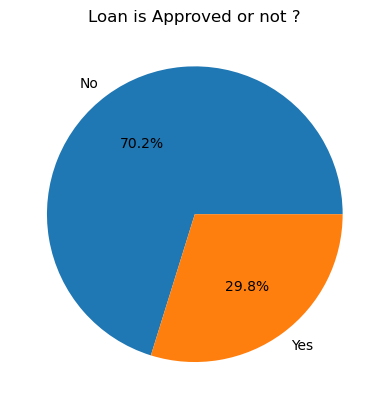

In [14]:

classes_count = loan_data["Loan_Approved"].value_counts()

plt.pie(classes_count, labels=["No","Yes"], autopct="%1.1f%%")
plt.title("Loan is Approved or not ?")

In [15]:
categorical_cols

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

<Axes: xlabel='Marital_Status', ylabel='count'>

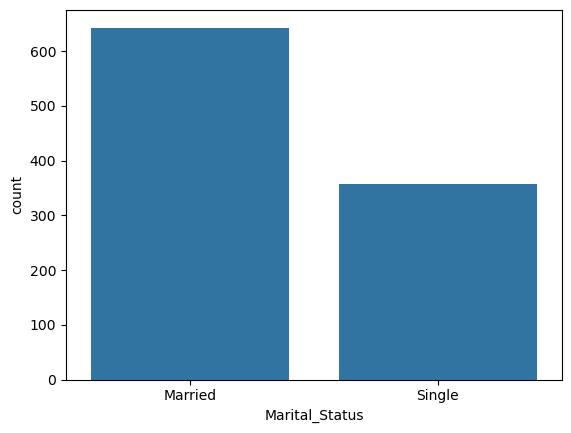

In [16]:
# analyze categories

# gender_cnt = loan_data["Gender"].value_counts()
# sns.barplot(gender_cnt)

# education_level = loan_data["Education_Level"].value_counts()
# sns.barplot(education_level)

# property_area = loan_data["Property_Area"].value_counts()
# sns.barplot(property_area)

# employment_status = loan_data["Employment_Status"].value_counts()
# sns.barplot(employment_status)

marital_status = loan_data["Marital_Status"].value_counts()
sns.barplot(marital_status)


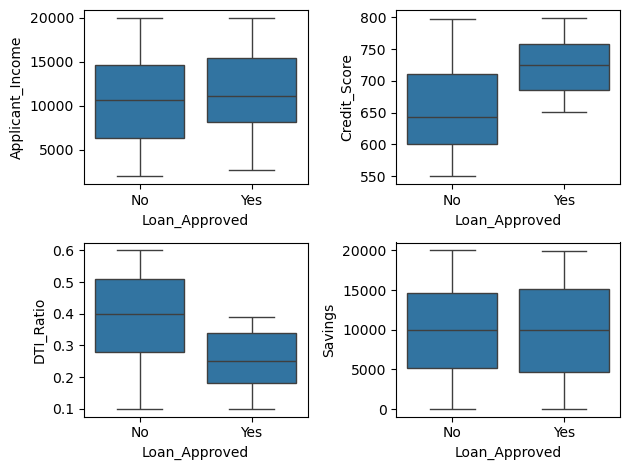

In [17]:
fig, axes = plt.subplots(2, 2)

sns.boxplot(ax=axes[0, 0], data=loan_data, x="Loan_Approved", y="Applicant_Income")
sns.boxplot(ax=axes[0, 1], data=loan_data, x="Loan_Approved", y="Credit_Score")
sns.boxplot(ax=axes[1, 0], data=loan_data, x="Loan_Approved", y="DTI_Ratio")
sns.boxplot(ax=axes[1, 1], data=loan_data, x="Loan_Approved", y="Savings")

plt.tight_layout()

Credit Score with Loan Approved

<Axes: xlabel='Credit_Score', ylabel='Count'>

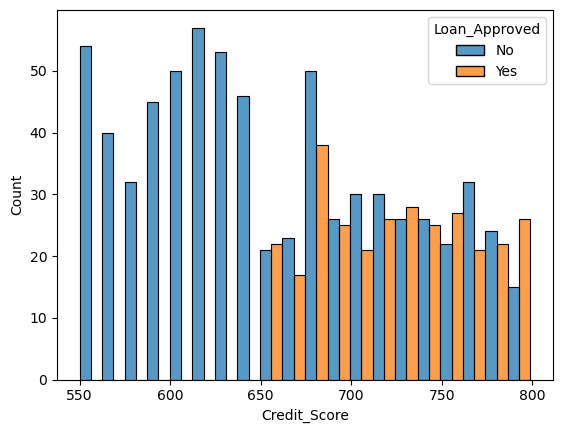

In [18]:


sns.histplot(
    data=loan_data,
    x="Credit_Score",
    hue="Loan_Approved",
    bins=20,
    multiple="dodge"
)

Remove Applicant ID

In [19]:

loan_data = loan_data.drop("Applicant_ID", axis=1)

Encoding

In [20]:

le = LabelEncoder()
loan_data["Education_Level"] = le.fit_transform(loan_data["Education_Level"])
loan_data["Loan_Approved"] = le.fit_transform(loan_data["Loan_Approved"])

In [21]:
loan_data.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,1,Female,Private,0
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,0,Male,Private,0
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,0,Female,Government,1
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,0,Female,Government,0
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,0,Male,Private,1


One Hot Encoding

In [22]:


cols = ["Employment_Status", "Marital_Status", "Loan_Purpose", "Property_Area", "Gender", "Employer_Category"]

ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

encoded = ohe.fit_transform(loan_data[cols])

encoded_data= pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cols), index=loan_data.index)

df = pd.concat([loan_data.drop(columns=cols), encoded_data], axis=1)

In [23]:
encoded

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

Correlation Heatmap

<Axes: >

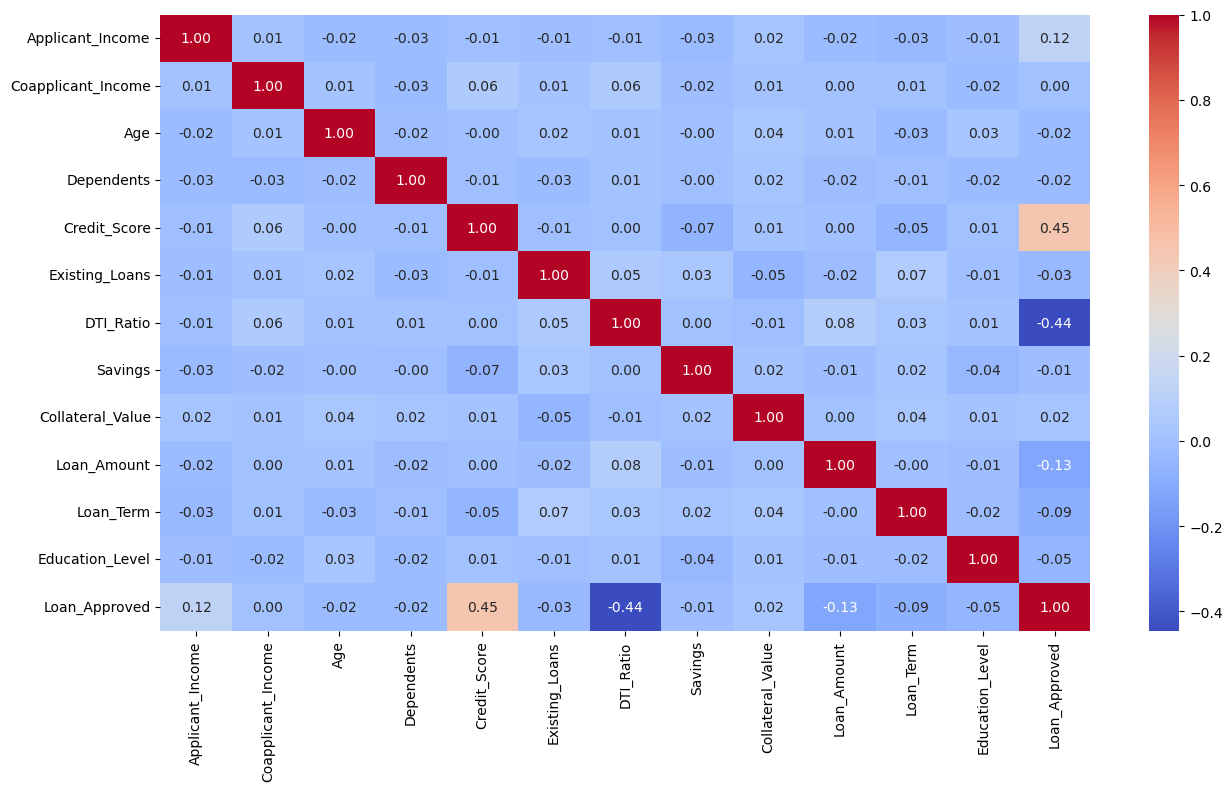

In [24]:

num_cols = loan_data.select_dtypes(include="number")
corr_matrix = num_cols.corr()

plt.figure(figsize=(15, 8))
           
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

In [25]:
num_cols.corr()["Loan_Approved"].sort_values(ascending=False)

Loan_Approved         1.000000
Credit_Score          0.451175
Applicant_Income      0.119796
Collateral_Value      0.021868
Coapplicant_Income    0.004230
Savings              -0.013437
Age                  -0.022343
Dependents           -0.023811
Existing_Loans       -0.034794
Education_Level      -0.052920
Loan_Term            -0.086644
Loan_Amount          -0.126499
DTI_Ratio            -0.444783
Name: Loan_Approved, dtype: float64

Train-Test-Split + Feature Engneering

In [26]:
X = loan_data.drop("Loan_Approved", axis=1)
y = loan_data["Loan_Approved"]

In [27]:
X = pd.get_dummies(X, drop_first=True)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state = 42)

In [29]:
X_train.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
29,5890.000000,8041.0,31.000000,0.0,603.000000,0.000000,0.11,11906.0,8150.000000,29287.000000,...,False,False,False,False,False,False,True,False,False,False
535,4779.000000,529.0,50.000000,0.0,614.000000,0.000000,0.21,5369.0,5430.000000,14786.000000,...,False,True,False,False,True,True,False,False,False,False
695,10852.571579,8927.0,36.000000,0.0,584.000000,4.000000,0.22,3186.0,24802.792632,20522.825263,...,False,False,True,True,False,True,False,False,True,False
557,2384.000000,2113.0,39.971579,1.0,726.000000,4.000000,0.34,11882.0,48542.000000,13312.000000,...,False,True,False,False,True,False,True,False,False,False
836,5228.000000,5249.0,42.000000,1.0,676.033684,1.950526,0.18,17669.0,24802.792632,13906.000000,...,False,True,False,False,True,False,False,False,True,False


In [30]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train_scaled

array([[-1.01234556e+00,  1.02716377e+00, -8.22511453e-01, ...,
        -4.13887756e-01, -8.59726954e-01, -3.07231582e-01],
       [-1.23639141e+00, -1.59187898e+00,  9.15886794e-01, ...,
        -4.13887756e-01, -8.59726954e-01, -3.07231582e-01],
       [-1.15862490e-02,  1.33606578e+00, -3.65038230e-01, ...,
        -4.13887756e-01,  1.16316000e+00, -3.07231582e-01],
       ...,
       [-2.27277589e-01,  3.50089621e-01, -8.22511453e-01, ...,
        -4.13887756e-01,  1.16316000e+00, -3.07231582e-01],
       [ 1.12970221e+00, -4.64700438e-01,  1.19037073e+00, ...,
        -4.13887756e-01, -8.59726954e-01, -3.07231582e-01],
       [-1.75526629e+00,  1.43417276e-02,  9.40348249e-04, ...,
         2.41611400e+00, -8.59726954e-01, -3.07231582e-01]])

Train & Evaluate Model

In [32]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression")
print("Accuracy Score", accuracy_score(y_test, y_pred))
print("precision Score", precision_score(y_test, y_pred))
print("Recall Score", recall_score(y_test, y_pred))
print("f1 Score", f1_score(y_test, y_pred))
print("CM", confusion_matrix(y_test, y_pred))

Logistic Regression
Accuracy Score 0.865
precision Score 0.7833333333333333
Recall Score 0.7704918032786885
f1 Score 0.7768595041322314
CM [[126  13]
 [ 14  47]]


In [33]:
# KNN Regression

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

# Evaluation
print("KNN Regression")
print("Accuracy Score", accuracy_score(y_test, y_pred))
print("precision Score", precision_score(y_test, y_pred))
print("Recall Score", recall_score(y_test, y_pred))
print("f1 Score", f1_score(y_test, y_pred))
print("CM", confusion_matrix(y_test, y_pred))

KNN Regression
Accuracy Score 0.76
precision Score 0.6274509803921569
Recall Score 0.5245901639344263
f1 Score 0.5714285714285714
CM [[120  19]
 [ 29  32]]


  File "E:\Anacondafiles\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "E:\Anacondafiles\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "E:\Anacondafiles\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\Anacondafiles\Lib\subprocess.py", line 1554, in _execute_chil

In [34]:
# Naive Bayes Regression

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

# Evaluation
print("Naive Bayes Regression")
print("Accuracy Score", accuracy_score(y_test, y_pred))
print("precision Score", precision_score(y_test, y_pred))
print("Recall Score", recall_score(y_test, y_pred))
print("f1 Score", f1_score(y_test, y_pred))
print("CM", confusion_matrix(y_test, y_pred))

Naive Bayes Regression
Accuracy Score 0.865
precision Score 0.8035714285714286
Recall Score 0.7377049180327869
f1 Score 0.7692307692307693
CM [[128  11]
 [ 16  45]]


Best Model on basis of Precision => Naive Bayes

Feature Engneering

In [35]:
loan_data["DTI_ratio_sq"] = loan_data["DTI_Ratio"] ** 2
loan_data["Credit_score_sq"] = loan_data["Credit_Score"] ** 2

X = loan_data.drop(columns=["Loan_Approved", "Credit_Score", "DTI_Ratio"])
y = loan_data["Loan_Approved"]

X = pd.get_dummies(X, drop_first=True)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state = 42)

# Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression")
print("Accuracy Score", accuracy_score(y_test, y_pred))
print("precision Score", precision_score(y_test, y_pred))
print("Recall Score", recall_score(y_test, y_pred))
print("f1 Score", f1_score(y_test, y_pred))
print("CM", confusion_matrix(y_test, y_pred))

Logistic Regression
Accuracy Score 0.875
precision Score 0.7903225806451613
Recall Score 0.8032786885245902
f1 Score 0.7967479674796748
CM [[126  13]
 [ 12  49]]


In [37]:
# KNN Regression

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

# Evaluation
print("KNN Regression")
print("Accuracy Score", accuracy_score(y_test, y_pred))
print("precision Score", precision_score(y_test, y_pred))
print("Recall Score", recall_score(y_test, y_pred))
print("f1 Score", f1_score(y_test, y_pred))
print("CM", confusion_matrix(y_test, y_pred))

KNN Regression
Accuracy Score 0.755
precision Score 0.62
Recall Score 0.5081967213114754
f1 Score 0.5585585585585585
CM [[120  19]
 [ 30  31]]


In [38]:
# Naive Bayes Regression

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

# Evaluation
print("Naive Bayes Regression")
print("Accuracy Score", accuracy_score(y_test, y_pred))
print("precision Score", precision_score(y_test, y_pred))
print("Recall Score", recall_score(y_test, y_pred))
print("f1 Score", f1_score(y_test, y_pred))
print("CM", confusion_matrix(y_test, y_pred))

Naive Bayes Regression
Accuracy Score 0.865
precision Score 0.7833333333333333
Recall Score 0.7704918032786885
f1 Score 0.7768595041322314
CM [[126  13]
 [ 14  47]]
